# First Example : Classify Movie Reviews

## Loading the IMDB dataset

In [4]:
from keras.datasets import imdb
( train_data , train_labels ) , ( test_data , test_labels ) = imdb.load_data(num_words = 10000)

0 stands for negative. 1 stands for positive.

In [ ]:
print(train_data[0])
print(len(train_data[0]),len(train_data[1]))
print(len(train_data))
print(train_labels[0])
print(len(test_data))

No word index will exceed 10000.

In [19]:
print(max([max(sequence) for sequence in train_data]))

9999


Decode one of these reviews back to English. 

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

## Encoding the integer sequence into binary matrix

>  One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector
that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a Dense layer, capable of handling
floating-point vector data.

In [5]:
import numpy as np
def vectorize_sequence(sequences , dimension = 10000):
    results = np.zeros((len(sequences) , dimension))
    for i , sequence in enumerate(sequences) :
        results[i , sequence] = 1.
    return results

vectorize data. 
tips: 那么是否忽略了顺序？比如 [3, 5] 与 [5, 3] 的编号相同?

In [6]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
print(x_train[0])
print(x_test[1])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


vectorize labels straightforward. 

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## The model definition

choose proper **hidden units** and **number of layers**.

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

## Compiling the model

find proper **loss function**, **optimizer** and **metrics**.
Here, we pass optimizer, loss function, metrics by **strings**. Because they can be viewed as being packaged as part of Keras, possibly.

In [9]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

alternative method

In [11]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer = optimizers.RMSprop(lr = 0.001), 
              loss = losses.binary_crossentropy, 
              metrics = metrics.binary_accuracy)

## Validating your approach

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

train

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20, 
                    batch_size = 512, 
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 50ms/step - loss: 0.5232 - acc: 0.7707 - val_loss: 0.3981 - val_acc: 0.8534
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3107 - acc: 0.9017 - val_loss: 0.3064 - val_acc: 0.8867
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2283 - acc: 0.9239 - val_loss: 0.2798 - val_acc: 0.8911
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1785 - acc: 0.9401 - val_loss: 0.2856 - val_acc: 0.8845
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1431 - acc: 0.9550 - val_loss: 0.2845 - val_acc: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1166 - acc: 0.9645 - val_loss: 0.3238 - val_acc: 0.8778
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0937 - acc: 0.9715 - val_loss: 0.3091 - val_acc: 0.8839
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0789 - a

What is **history**? 

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

plotting training and validation loss

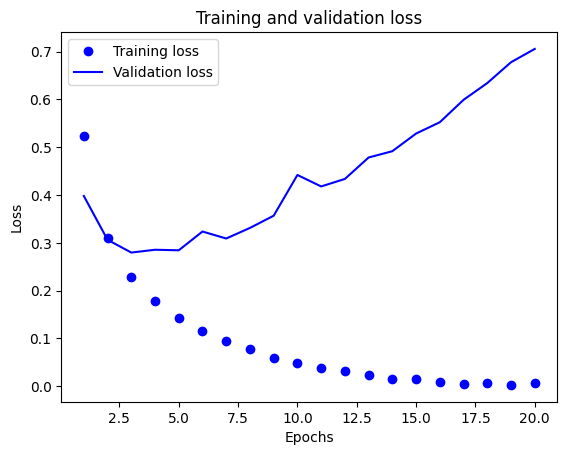

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plotting the training and validation accuracy

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The results show that the model is overfitting.
> Let’s train a new network from scratch for four epochs and then evaluate it on the
test data.
epochs = 4

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)
print(results)

generate new predictions on new data

In [ ]:
model.predict(x_test)

In [18]:
from numpy import array
print(array([x_test[1]]))
model.predict(array([x_test[1]]))

[[0. 1. 1. ... 0. 0. 0.]]
1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)